# Welcome to the Markov-Model hands-on tutorial

If you are reading this, you are on the right path already! This is a "Python notebook":
a series of commands mixed with comments that you may execute, modify, re-execute
at will.

Cells are executed with **Shift+Enter**. If you need to start over, use **Kernel/Restart** in the top menu.

# Ligand binding

This tutorial shows the Markov model-based computation "macroscopic" quantities 
in a realistic system, simulated with extensive MD. Due to the 
amount of geometric manipulation needed for the molecules,
we shall use the Python-based system HTMD (high throughput
molecular dynamics). More information at www.htmd.org. 

This tutorial in based on the examples and datasets at https://software.acellera.com/docs/latest/htmd/userguide/analysing.html

There are 3 data sets already downloaded for you:
* `/mnt/scratch/shared/markov/binding` Ligand binding
* `/mnt/scratch/shared/markov/villin`  Villin folding
* `/mnt/scratch/shared/markov/cxcl12`  GPCR conformational transition

This demo shows the ligand-binding example. A part of the exercise will be to modify
it to compute the kinetics in one of the other two systems.

## Getting started

First we import the modules we are going to need for the tutorial. Please execute the following cell and ignore the output.

In [1]:
%pylab inline
import os
from htmd.ui import *
config(viewer='webgl')

Populating the interactive namespace from numpy and matplotlib

Copyright by Acellera Ltd. By executing you are accepting the License. In order to register, run htmd_register on your terminal

ffevaluate module is in beta version


## Creating a simulation list

In this tutorial, in order for the trajectories to be downloaded in a timely manner, we provide only the filtered trajectories, which are stored in three separate dataset folders. Therefore we will skip the above two commands and construct the simulation list directly from the filtered trajectories:

In [2]:
sets = glob('/mnt/scratch/shared/markov/binding/?')
sims = []
for s in sets:
    fsims = simlist(glob(s + '/filtered/*/'), s+'/filtered/filtered.pdb')
    sims = simmerge(sims, fsims)

Creating simlist:   0%|          | 0/309 [00:00<?, ?it/s]/mnt/scratch/shared/miniconda/envs/htmd/lib/python3.6/site-packages/pyemma/__init__.py:91: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.4, you have 2.4.
  .format(latest=latest, current=current), category=UserWarning)
Creating simlist: 100%|██████████| 314/314 [00:00<00:00, 4146.76it/s]


## Calculating metrics

To build a Markov state model we need to project the atom coordinates onto a lower dimensional space which can be used for clustering the conformations into a set of states. For protein systems we typically use the binary contact map between the carbon alpha atoms of the protein. This will calculate contacts between all carbon-alpha atoms. 

In [3]:
metr = Metric(sims)
metr.set(MetricDistance('protein and name CA', 'resname MOL and noh', metric='contacts'))
data = metr.project()

2019-01-14 16:36:32,675 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name C1   as the guessed element "C1" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:36:32,679 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name C2   as the guessed element "C2" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:36:32,683 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name C3   as the guessed element "C3" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:36:32,686 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name C4   as the guessed element "C4" was not found in the periodic table. Check for incorrect column alignment in the PDB fi

2019-01-14 16:36:32,807 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name HB1  as the guessed element "Hb" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:36:32,811 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name HB2  as the guessed element "Hb" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:36:32,814 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name HB3  as the guessed element "Hb" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:36:32,817 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name HD1  as the guessed element "Hd" was not found in the periodic table. Check for incorrect column alignment in the PDB fi

2019-01-14 16:36:33,187 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name CG   as the guessed element "Cg" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:36:33,190 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name CG1  as the guessed element "Cg" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:36:33,194 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name CG2  as the guessed element "Cg" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:36:33,197 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name CH2  as the guessed element "Ch" was not found in the periodic table. Check for incorrect column alignment in the PDB fi

2019-01-14 16:36:33,359 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name HH2  as the guessed element "Hh" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:36:33,367 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name HZ   as the guessed element "Hz" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:36:33,371 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name HZ1  as the guessed element "Hz" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:36:33,374 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name HZ2  as the guessed element "Hz" was not found in the periodic table. Check for incorrect column alignment in the PDB fi

2019-01-14 16:36:33,680 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name H1   as the guessed element "H1" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:36:33,683 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name H10  as the guessed element "H1" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:36:33,686 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name H11  as the guessed element "H1" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:36:33,690 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name H12  as the guessed element "H1" was not found in the periodic table. Check for incorrect column alignment in the PDB fi

2019-01-14 16:36:33,854 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name N3   as the guessed element "N3" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:36:33,874 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name NZ   as the guessed element "Nz" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:36:33,880 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name OD1  as the guessed element "Od" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:36:33,884 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name OD2  as the guessed element "Od" was not found in the periodic table. Check for incorrect column alignment in the PDB fi

2019-01-14 16:36:34,167 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name H3   as the guessed element "H3" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:36:34,171 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name H4   as the guessed element "H4" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:36:34,174 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name H5   as the guessed element "H5" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:36:34,177 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name H6   as the guessed element "H6" was not found in the periodic table. Check for incorrect column alignment in the PDB fi

2019-01-14 16:36:34,380 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name OXT  as the guessed element "Ox" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:36:34,384 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name SD   as the guessed element "Sd" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:36:34,391 - htmd.molecule.readers - WARNING - Atoms with names "HE21" "HE22" were guessed as element H but could also be He (helium). If this is a case, you can correct them with mol.set('element', 'He', sel='name "HE21" "HE22"')
2019-01-14 16:36:34,392 - htmd.molecule.readers - WARNING - Atoms with names "HG11" "HG12" "HG13" "HG21" "HG22" "HG23" were guessed as element H but could also be Hg (mercury). If this is a case, you can correct them with mol.set('element

Here, we also provide the frame-step in nanoseconds i.e. the time that passes between two consecutive frames in a trajectory. This should be automatically read from the trajectories, but some simulation software does not contain the correct fstep in the trajectories, so it can be useful to manually define it:

In [4]:
data.fstep = 0.1

## Removing trajectories

Sometimes the set of trajectories can contain trajectories of incorrect length. These are typically corrupted trajectories and are removed.

The `plotTrajSizes` method plots all trajectory lengths, sorted:

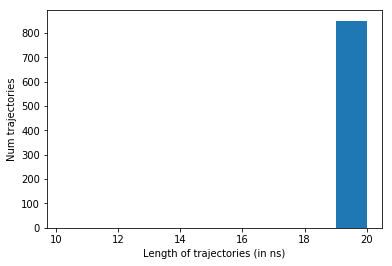

In [5]:
data.plotTrajSizes()

The `dropTraj` method has multiple options for removing simulations from the dataset. Here, we use it to remove all trajectories whose length is not equal to the mode length:

In [6]:
data.dropTraj()

2019-01-14 16:36:50,564 - htmd.metricdata - INFO - Dropped 2 trajectories from 852 resulting in 850


array([183, 249])

## TICA

TICA is a method that can be used to improve the clustering of the conformations. This is done by projecting the data onto a lower-dimensional space which separates well the metastable minima and places clusters on the transition regions. 

In [7]:
tica = TICA(data, 2, units='ns')
dataTica = tica.project(3)

A Jupyter Widget

A Jupyter Widget

## Clustering conformations

Once we have cleaned the dataset we proceed to cluster the conformations.

Here we use the mini-batch kmeans clustering algorithm to produce 1000 clusters.

In [8]:
dataTica.cluster(MiniBatchKMeans(n_clusters=1000))

## Building the Markov model

After clustering it is time to build the Markov model.

In [9]:
model = Model(dataTica)

Before constructing the Markov model, we need to choose the lag-time at which it will be built. The lag-time is typically chosen by looking at the implied timescale (ITS) plot and selecting a lag-time at which the top timescales start converging. By constructing Markov models at various lag times HTMD creates a plot which shows the slowest implied timescales of each Markov model at various lag times. If a model is Markovian at a specific lag time, the implied timescales should stay unchanged for any higher lag times. Therefore, given an implied timescales plot, the user can monitor the convergence and choose the lag time at which to construct his Markov model, typically the Markov time which is the shortest lag time at which the timescales converge. Too large lag times can reduce the temporal resolution of the Markov model and can create more statistical uncertainty due to fewer transition counts and thus instability in the implied timescales. 

A Jupyter Widget

14-01-19 16:44:52 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[2] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


2019-01-14 16:44:52,252 - pyemma.msm.estimators.implied_timescales.ImpliedTimescales[2] - WARNING - Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


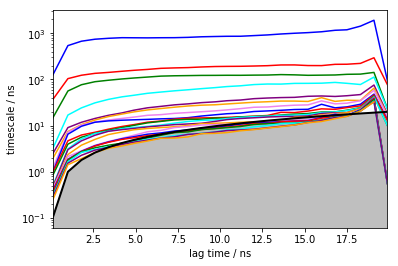

In [10]:
model.plotTimescales()

After seeing the ITS plot we decided on a lag-time of 50 frames (5ns). Additionally the ITS plot showed us that there is a separation between 4 slow timescales and the rest of the timescales which are fast. Therefore we choose to lump our microstates together into 5 macrostates. 

In [11]:
model.markovModel(5, 5, units='ns')

2019-01-14 16:44:59,451 - htmd.model - INFO - 100.0% of the data was used
2019-01-14 16:44:59,484 - htmd.model - INFO - Number of trajectories that visited each macrostate:
2019-01-14 16:44:59,485 - htmd.model - INFO - [188 131 459 160 276]


Once we have a Markov model we can plot the free energy surface by projecting it on any of our projected coordinates. For example to plot it on the first two TICA coordinates we call it like this.

/mnt/scratch/shared/miniconda/envs/htmd/lib/python3.6/site-packages/htmd/metricdata.py:795: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2.
  zi = griddata(x, y, z, xi, yi, interp='linear')


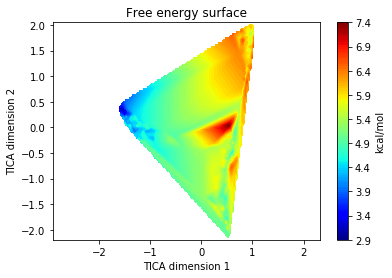

In [12]:
model.plotFES(0, 1, temperature=298)

We can also plot the micro and macrostates on top of the FES by setting `states=True`

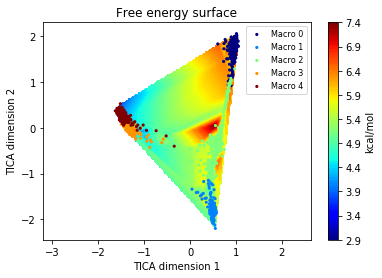

In [13]:
model.plotFES(0, 1, temperature=298, states=True)

## Visualizing the states

To see what the states look like we can use the `viewStates` method. We load the macrostates and add a ligand representation using the ligand atomselection.

In [14]:
model.viewStates(ligand='resname MOL and noh')

2019-01-14 16:45:00,272 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name C1   as the guessed element "C1" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:00,276 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name C2   as the guessed element "C2" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:00,280 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name C3   as the guessed element "C3" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:00,283 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name C4   as the guessed element "C4" was not found in the periodic table. Check for incorrect column alignment in the PDB fi

2019-01-14 16:45:00,413 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name HB1  as the guessed element "Hb" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:00,416 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name HB2  as the guessed element "Hb" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:00,420 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name HB3  as the guessed element "Hb" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:00,423 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name HD1  as the guessed element "Hd" was not found in the periodic table. Check for incorrect column alignment in the PDB fi

2019-01-14 16:45:00,792 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name CG   as the guessed element "Cg" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:00,795 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name CG1  as the guessed element "Cg" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:00,799 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name CG2  as the guessed element "Cg" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:00,802 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name CH2  as the guessed element "Ch" was not found in the periodic table. Check for incorrect column alignment in the PDB fi

2019-01-14 16:45:00,963 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name HH2  as the guessed element "Hh" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:00,972 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name HZ   as the guessed element "Hz" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:00,975 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name HZ1  as the guessed element "Hz" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:00,978 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name HZ2  as the guessed element "Hz" was not found in the periodic table. Check for incorrect column alignment in the PDB fi

2019-01-14 16:45:01,280 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name H1   as the guessed element "H1" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:01,284 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name H10  as the guessed element "H1" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:01,287 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name H11  as the guessed element "H1" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:01,290 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name H12  as the guessed element "H1" was not found in the periodic table. Check for incorrect column alignment in the PDB fi

2019-01-14 16:45:01,454 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name N3   as the guessed element "N3" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:01,475 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name NZ   as the guessed element "Nz" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:01,481 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name OD1  as the guessed element "Od" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:01,484 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name OD2  as the guessed element "Od" was not found in the periodic table. Check for incorrect column alignment in the PDB fi

2019-01-14 16:45:01,771 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name H3   as the guessed element "H3" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:01,775 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name H4   as the guessed element "H4" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:01,778 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name H5   as the guessed element "H5" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:01,782 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name H6   as the guessed element "H6" was not found in the periodic table. Check for incorrect column alignment in the PDB fi

2019-01-14 16:45:01,976 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name OXT  as the guessed element "Ox" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:01,979 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name SD   as the guessed element "Sd" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:01,985 - htmd.molecule.readers - WARNING - Atoms with names "HE21" "HE22" were guessed as element H but could also be He (helium). If this is a case, you can correct them with mol.set('element', 'He', sel='name "HE21" "HE22"')
2019-01-14 16:45:01,986 - htmd.molecule.readers - WARNING - Atoms with names "HG11" "HG12" "HG13" "HG21" "HG22" "HG23" were guessed as element H but could also be Hg (mercury). If this is a case, you can correct them with mol.set('element

2019-01-14 16:45:02,638 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name HA   as the guessed element "Ha" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:02,641 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name HA2  as the guessed element "Ha" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:02,645 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name HA3  as the guessed element "Ha" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:02,648 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name HB   as the guessed element "Hb" was not found in the periodic table. Check for incorrect column alignment in the PDB fi

2019-01-14 16:45:03,473 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name C4   as the guessed element "C4" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:03,476 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name C5   as the guessed element "C5" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:03,479 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name C6   as the guessed element "C6" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:03,485 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name CB   as the guessed element "Cb" was not found in the periodic table. Check for incorrect column alignment in the PDB fi

2019-01-14 16:45:03,605 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name HD1  as the guessed element "Hd" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:03,615 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name HD2  as the guessed element "Hd" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:03,626 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name HD3  as the guessed element "Hd" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:03,670 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name HH   as the guessed element "Hh" was not found in the periodic table. Check for incorrect column alignment in the PDB fi

2019-01-14 16:45:04,653 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name CH2  as the guessed element "Ch" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:04,657 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name CZ   as the guessed element "Cz" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:04,660 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name CZ2  as the guessed element "Cz" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:04,663 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name CZ3  as the guessed element "Cz" was not found in the periodic table. Check for incorrect column alignment in the PDB fi

2019-01-14 16:45:04,829 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name HZ2  as the guessed element "Hz" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:04,832 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name HZ3  as the guessed element "Hz" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:04,838 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name N1   as the guessed element "N1" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:04,841 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name N2   as the guessed element "N2" was not found in the periodic table. Check for incorrect column alignment in the PDB fi

2019-01-14 16:45:05,975 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name H12  as the guessed element "H1" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:05,978 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name H13  as the guessed element "H1" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:05,981 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name H14  as the guessed element "H1" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:05,984 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name H2   as the guessed element "H2" was not found in the periodic table. Check for incorrect column alignment in the PDB fi

2019-01-14 16:45:06,169 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name OD2  as the guessed element "Od" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:06,172 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name OE1  as the guessed element "Oe" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:06,176 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name OE2  as the guessed element "Oe" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:06,184 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name OH   as the guessed element "Oh" was not found in the periodic table. Check for incorrect column alignment in the PDB fi

2019-01-14 16:45:07,170 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name H6   as the guessed element "H6" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:07,177 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name H7   as the guessed element "H7" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:07,181 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name H8   as the guessed element "H8" was not found in the periodic table. Check for incorrect column alignment in the PDB file or report to HTMD issue tracker.
2019-01-14 16:45:07,184 - htmd.molecule.readers - WARNING - Element guessing failed for atom with name H9   as the guessed element "H9" was not found in the periodic table. Check for incorrect column alignment in the PDB fi

2019-01-14 16:45:07,375 - htmd.molecule.readers - WARNING - Atoms with names "HG11" "HG12" "HG13" "HG21" "HG22" "HG23" were guessed as element H but could also be Hg (mercury). If this is a case, you can correct them with mol.set('element', 'Hg', sel='name "HG11" "HG12" "HG13" "HG21" "HG22" "HG23"')
Getting state Molecules: 100%|██████████| 5/5 [00:05<00:00,  1.15s/it]


A Jupyter Widget

A Jupyter Widget

## Calculating the kinetics

One of the major advantages of Markov state models is that they can provide quantitative results about the kinetics between states.

Provide the `Kinetics` class with the system temperature and ligand concentration. It automatically then calculates the source and sink states.

In [15]:
kin = Kinetics(model, temperature=298, concentration=0.0037)

2019-01-14 16:45:10,750 - htmd.kinetics - INFO - Detecting source state...
2019-01-14 16:45:11,404 - htmd.kinetics - INFO - Guessing the source state as the state with minimum contacts.
2019-01-14 16:45:11,405 - htmd.kinetics - INFO - Source macro = 2
2019-01-14 16:45:11,406 - htmd.kinetics - INFO - Detecting sink state...
2019-01-14 16:45:11,408 - htmd.kinetics - INFO - Sink macro = 4


To see the rates between the source and sink states we use the getRates method.

In [16]:
r = kin.getRates()
print(r)

2019-01-14 16:45:11,412 - htmd.kinetics - INFO - Calculating rates between source: [2] and sink: [4] states.
2019-01-14 16:45:11,475 - htmd.kinetics - INFO - Concentration correction of -3.32 kcal/mol.


mfpton = 8.68E+02 (ns)
mfptoff = 4.73E+03 (ns)
kon = 3.12E+08 (1/M 1/s)
koff = 2.12E+05 (1/s)
koff/kon = 6.79E-04 (M)
kdeq = 5.33E-04 (M)
g0eq = -4.46 (kcal/M)



To plot the free energies and mean first passage times of all state relative to the source state, use the `plotRates` method:

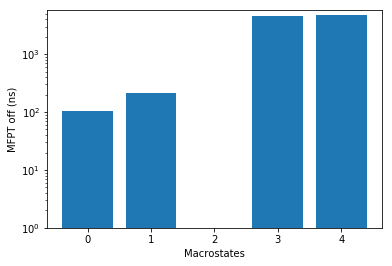

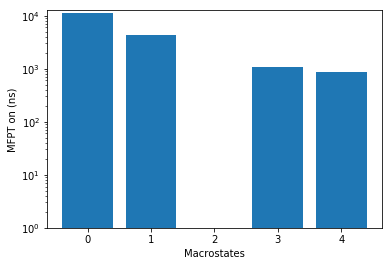

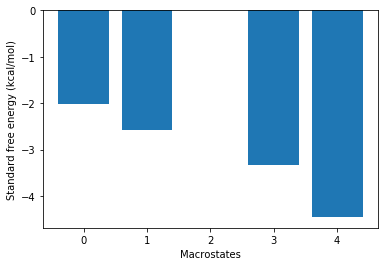

In [17]:
kin.plotRates()

To visualize the kinetic flux pathways between the source and sink states, use the `plotFluxPathways` method:

/mnt/scratch/shared/miniconda/envs/htmd/lib/python3.6/site-packages/pyemma/plots/networks.py:544: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if state_labels == 'auto':
/mnt/scratch/shared/miniconda/envs/htmd/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Path flux		%path	%of total	path
1.1269491824136142e-05	58.8%	58.8%		[2 4]
7.38330088734806e-06	38.5%	97.4%		[2 3 4]
4.691213399965739e-07	2.4%	99.8%		[2 1 4]
3.185845563963116e-08	0.2%	100.0%		[2 1 3 4]


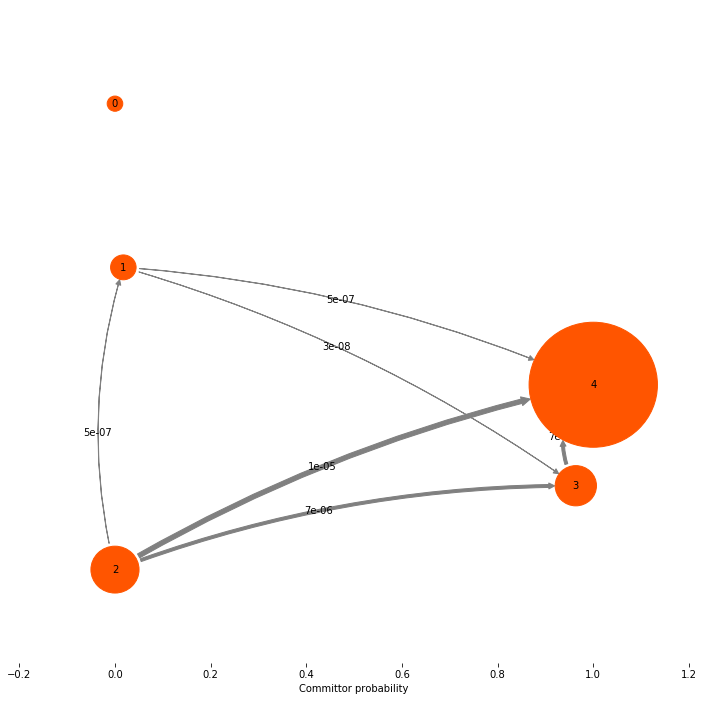

In [18]:
kin.plotFluxPathways()

And this concludes the ligand binding tutorial.